In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

import sklearn
from sklearn import metrics
from sklearn import feature_selection
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

### Question One

In [11]:
os.chdir("/Users/adeniyiharrison/Desktop/Shipt")
cost = pd.read_csv("InterviewData_Cost.csv")
rev = pd.read_csv("InterviewData_Rev.csv")

costRev = cost.merge(rev, how = "outer", left_on = ["date", "source_id"], right_on = ["date", "source_id"])

### Question Two

In [19]:
costRev[(pd.isnull(costRev["revenue"])) & pd.notnull(costRev["cost"])]

,date,source_id,cost,revenue
4,11/30/14,PA0923,5586.0,NaN
6,12/17/14,PA0952,6662.0,NaN
7,5/22/14,PA0411,4795.0,NaN
9,10/14/14,PA0168,9651.0,NaN
10,2/13/14,PA0354,2752.0,NaN
12,11/23/14,PA0277,5691.0,NaN
13,11/27/14,PA0057,7423.0,NaN
16,3/29/14,PA0552,7894.0,NaN
20,4/3/14,PA0619,4288.0,NaN
22,8/21/14,PA0552,4653.0,NaN


### Question Three

In [25]:
costRev.groupby("source_id")["revenue"].sum().sort_values(ascending = False).head(4)

source_id
PA0527    1385747.0
PA0308    1338615.0
PA0352    1309685.0
PA0552    1283190.0
Name: revenue, dtype: float64

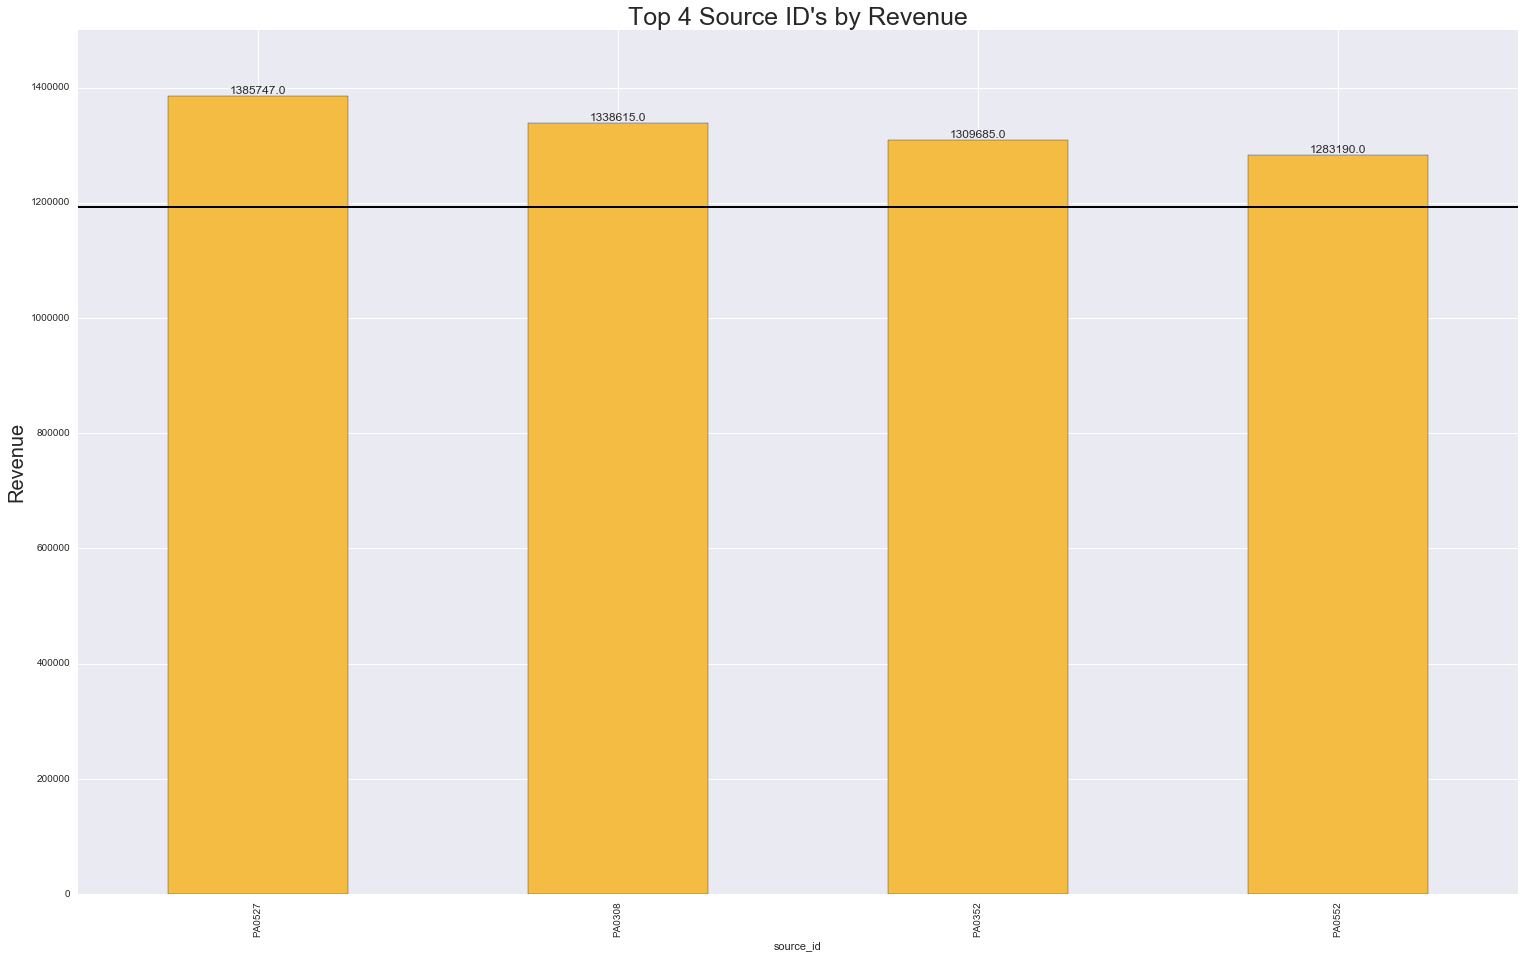

In [50]:
fig = plt.figure(figsize = (20,12))
axes = fig.add_axes([0,0,1,1])
axes.set_ylim([0,1500000])
x_labels = costRev.groupby("source_id")["revenue"].sum().sort_values(ascending = False)[:4].tolist()
axes.set_ylabel("Revenue", fontsize = 20)
axes.set_title("Top 4 Source ID's by Revenue", fontsize = 25)

rect = axes.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2, height + 7, label, ha='center', va='bottom')
    
axes.axhline(costRev.groupby("source_id")["revenue"].sum().mean(), color='black', linewidth=2)

costRev.groupby("source_id")["revenue"].sum().sort_values(ascending = False).head(4).plot(kind = 'bar', color = "#f4bc42")

<p style="font-family:courier; font-size: 20px"> I belive a bar chart is the best way to represent the top 4 Source ID's, the average line provides context to how the other source ID's are performing as well. </p>

### Question Four

In [55]:
# df = pd.read_csv("InterviewData_Activity.csv")

dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.ix[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.ix[:, 'metro_area_Birmingham':])

activity_data = activity_data.join(dummy_device.ix[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'], activity_data[explanatory_cols], family=sm.families.Binomial())
result = full_logit_model.fit()

In [65]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 5420
Model:                            GLM   Df Residuals:                     5408
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3613.1
Date:                Tue, 01 Aug 2017   Deviance:                       7226.3
Time:                        20:34:40   Pearson chi2:                 5.38e+03
No. Iterations:                    24                                         
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
age                       0.0136      0.003      5.180      0.000         0.008     0.019
gender_M                 -0.6103      0.083     -7.343      0.000        -0.773    -0.447
metro_area_Birmingham    -0.0547      0.095     -0.576      0.564        -0.241     0.131
metro_area_Charlotte     -1.8619      0.337     -5.529      0.000        -2.522    -1.202
metro_area_Detroit       -0.0792      0.115     -0.689      0.491        -0.304     0.146
metro_area_Houston       -0.4496      0.093     -4.850      0.000        -0.631    -0.268
metro_area_Mobile        -1.7244      0.259     -6.655      0.000        -2.232    -1.217
metro_area_Nashville     24.4506   3.66e+04      0.001      0.999     -7.17e+04  7.18e+04
metro_area_Tampa          0.1370      0.104      1.312      0.189        -0.068     0.342
device_Mobile            -1.5004      0.264     -5.685      0.000        -2.018    -0.983
device_Tablet            -1.2342      0.269     -4.585      0.000        -1.762    -0.707
const                     1.1553      0.290      3.991      0.000         0.588     1.723
=========================================================================================
"""

In [93]:
def confusion(y, X):
    prediction = []
    for number in result.predict(X).tolist():
        if number >= .5:
            prediction.append(1)
        else:
            prediction.append(0)

    print(metrics.confusion_matrix(y,prediction))
    holder = metrics.confusion_matrix(y,prediction)
    TP = holder[0][0]
    TN = holder[1][1]
    FP = holder[1][0]
    FN = holder[0][1]
    
    print("Accuracy: ", (TP + TN) / (TP + TP + FN + FP))
    print("Precision: ", (TN) / (TN + FN))

In [94]:
confusion(activity_data['active'], activity_data[explanatory_cols])

[[1626 1164]
 [1109 1521]]
Accuracy:  0.569592760181
Precision:  0.566480446927


<p style="font-family:courier; font-size: 20px"> The Model when tested using the the same data set it was trained upon showed an accuracy of 58% when predicting whether a member is active or not </p>

### Question Five

In [78]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'], training_data[explanatory_cols], family=sm.families.Binomial())

training_result = training_logit_model.fit()

In [96]:
confusion(test_data['active'], test_data[explanatory_cols])

[[787 503]
 [ 53  76]]
Accuracy:  0.405164319249
Precision:  0.131260794473


<p style="font-family:courier; font-size: 20px"> The model with an actual train test split performs worse than a model where the test was performed on the same data it was trained with is because Bias. The first model was higly biased because the model already seen the data used to test it which leads to lopsided/misleading results. However with the second model was being validated with a completely new and unknown dataset therefore the accuracy score is more representive of the models predicting ability. </p> 

### Question Six

In [181]:
import json
parse = pd.read_csv("InterviewData_Parsing.csv")
parse["data_to_parse"] = parse["data_to_parse"].apply(lambda x: eval(str("{" + x).replace("]", "")))

parse["One"] = parse["data_to_parse"].apply(lambda x: x["value"].split(";")[0])
parse["Two"] = parse["data_to_parse"].apply(lambda x: x["value"].split(";")[1])
parse["Three"] = parse["data_to_parse"].apply(lambda x: x["value"].split(";")[2])
parse["Four"] = parse["data_to_parse"].apply(lambda x: x["value"].split(";")[3])

In [183]:
parse

,userid,data_to_parse,One,Two,Three,Four
0,54f3ad9a29ada,{'value': 'N;U;A7;W'},N,U,A7,W
1,54f69f2de6aec,{'value': 'N;U;I6;W'},N,U,I6,W
2,54f650f004474,{'value': 'Y;U;A7;W'},Y,U,A7,W
3,54f52e8872227,{'value': 'N;U;I1;W'},N,U,I1,W
4,54f64d3075b72,{'value': 'Y;U;A7;W'},Y,U,A7,W
5,54f69dc01793f,{'value': 'N;U;A1;W'},N,U,A1,W
6,54f5d26833ce6,{'value': 'N;U;A1;W'},N,U,A1,W
7,54f52b1a7e647,{'value': 'N;U;A4;W'},N,U,A4,W
8,54f4ae7da8d01,{'value': 'N;U;A1;W'},N,U,A1,W
9,54f6290ca187d,{'value': 'N;U;U;W'},N,U,U,W


### Additional Question (Question C)

In [184]:
os.chdir("/Users/adeniyiharrison/Desktop/Shipt/Shipt")

<p style="font-family:courier; font-size: 16px"> 

In order to quantify the changes between the offer acceptance rate of the shoppers before and after the revamp we will need to perform a T Test between the two population to identify statistically significant differences between the two populations <br><br>

First, we will need to need to calculate the acceptance rate by each shopper in both the before revamp sample population and the after revamp sample population. Now we should have a distribution of shopper acceptance rates in both populations. With these 2 distributions we will need to calculate the mean acceptance rate for each sample, standard deviations of the sample’s mean acceptance rate for both samples and total number of observations (number of unique shoppers) in each sample. <br><br>

Now that we have all the variables we need we imput them into the following function to calculate the T Value

<img src = "t-test-formula.jpg" style = "width: 20%; height: 20%"/><br><br>

Once the T Value has been determined we need to look up the Critical T Value from a T Distribution Table or T Distribution Calculator. In order to calculate the Critical T Value score we need to select a p value which will give us confidence percentage (Usually in academia the cut off is usually .05 ) and Degrees of Freedom which is the sum of the number of observations in both samples subtracted by 2. If the T Value > Critical T Value then we reject the null hypothesis basically saying with statistical significance the 2 populations are not equal and one sample out-performed the other. (Sample Mean of Shopper's Acceptance Rate After the Revamp - Sample Mean of Shopper's Acceptance Rate Before the Revamp = How much the revamp improved/negatively affected Shopper's Acceptance Rate) <br><br>

<span style = "font-weight: 900;"> Example Statement: With 95% confidence We Reject the null hypothesis and conclude that the revamp improved/negatively improved shopper's acceptance rate by X%.</span>

</p>